In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from math import exp

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.regularizers import l2


### Reading dataset

In [ ]:
# df = pd.read_json (r'/content/drive/My Drive/Colab Folder/data.json')

with open('/content/drive/My Drive/Colab Folder/data.json', encoding='utf-8') as fh:
    data = json.load(fh)

In [ ]:
data[0]

{'author': 'গাজীপুর প্রতিনিধি',
 'category': 'bangladesh',
 'category_bn': 'বাংলাদেশ',
 'comment_count': 0,
 'content': 'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্য

In [ ]:
length_dataset  = len(data)
length_dataset

437948

### Unique Category

In [ ]:
# unique categories
unique_category = set([cat['category'] for cat in data])
unique_category

{'-1',
 '22221',
 'AskEditor',
 'bangladesh',
 'bondhushava',
 'bs-events',
 'chakri-bakri',
 'demo-content',
 'diverse',
 'durporobash',
 'economy',
 'education',
 'entertainment',
 'events',
 'facebook',
 'international',
 'kishoralo',
 'life-style',
 'mpaward1',
 'nagorik-kantho',
 'northamerica',
 'onnoalo',
 'opinion',
 'pachmisheli',
 'protichinta',
 'roshalo',
 'special-supplement',
 'sports',
 'tarunno',
 'technology',
 'trust',
 'we-are'}

In [ ]:
# Length of unique category
len(unique_category)

32

In [ ]:
all_cat= [cat['category'] for cat in data] 
len(all_cat)

437948

In [ ]:
# Total number of each unique category
number_unique_cat = []
for u_cat in unique_category:
  number_unique_cat.append(all_cat.count(u_cat))

sorted(number_unique_cat)[::-1]

[232504,
 49012,
 30856,
 30466,
 17245,
 15699,
 12116,
 10852,
 9721,
 7402,
 6990,
 3443,
 2999,
 2702,
 2604,
 990,
 859,
 508,
 443,
 170,
 123,
 83,
 75,
 40,
 17,
 11,
 10,
 2,
 2,
 2,
 1,
 1]

In [ ]:
zipping = zip(number_unique_cat, unique_category)
zipping = list(zipping)
zipping

[(7402, 'durporobash'),
 (443, 'trust'),
 (2702, 'onnoalo'),
 (30856, 'international'),
 (1, 'bs-events'),
 (30466, 'entertainment'),
 (10852, 'life-style'),
 (9721, 'education'),
 (11, '22221'),
 (49012, 'sports'),
 (2999, 'we-are'),
 (83, 'nagorik-kantho'),
 (12116, 'technology'),
 (15699, 'opinion'),
 (859, 'special-supplement'),
 (17, 'mpaward1'),
 (10, 'facebook'),
 (2, 'events'),
 (17245, 'economy'),
 (170, 'protichinta'),
 (40, 'tarunno'),
 (2, 'demo-content'),
 (990, 'bondhushava'),
 (6990, 'northamerica'),
 (232504, 'bangladesh'),
 (508, 'kishoralo'),
 (75, 'chakri-bakri'),
 (123, '-1'),
 (2, 'diverse'),
 (1, 'AskEditor'),
 (2604, 'roshalo'),
 (3443, 'pachmisheli')]

In [ ]:
selected_category = []
for z in zipping:
  if z[0] > 10000:
    selected_category.append(z[1])

selected_category

['international',
 'entertainment',
 'life-style',
 'sports',
 'technology',
 'opinion',
 'economy',
 'bangladesh']

### Feature and Label data

In [ ]:
X_feature = []
y_label = []

for p in data:
  if p['category'] in selected_category:
    X_feature.append(p['title'])
    y_label.append(p['category'])

In [ ]:
print(f"Shape of X_feature is {len(X_feature)} and Shape of y_label is {len(y_label)}")

Shape of X_feature is 398750 and Shape of y_label is 398750


### Printing some Feature and Label text

In [ ]:
for txt in range(5):
  print(X_feature[txt])

কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক্ষোভ
সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি
সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত
পাসওয়ার্ড ভুলে যান!
চলে গেলেন মাউস উদ্ভাবক


In [ ]:
for l in range(5):
  print(y_label[l])

bangladesh
sports
bangladesh
technology
technology


### Encoding of Label data

In [ ]:
encoder = LabelEncoder()
class_labels = encoder.fit_transform(y_label)

In [ ]:
set(class_labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
l = len(class_labels)
l

398750

### OneHotEncoding

In [ ]:
ohe = OneHotEncoder(sparse=False) 
class_labels = class_labels.reshape((class_labels.shape[0], 1))
y_ohe = ohe.fit_transform(class_labels)

In [ ]:
y_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Tokenizing

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_feature)
X_token = tokenizer.texts_to_sequences(X_feature)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1 
vocab_size

119053

### Some token and text

In [ ]:
for txt_tkn in range(2):
  print(X_feature[txt_tkn])
  print(X_token[txt_tkn])

কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক্ষোভ
[8195, 7499, 7184, 1405, 282, 713, 157]
সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি
[7669, 42614, 10234, 232, 34719]


### Pad Sequence

In [ ]:
max_len = 15
X_pad = pad_sequences(X_token, padding='post', maxlen=max_len)

### Appeared word count

In [ ]:
word_list = []
for sen in X_feature:
  word_list.extend(sen.split())

len(word_list)  

1961315

In [ ]:
counter = Counter(word_list)
most_common = counter.most_common(100) 
print(most_common) 

[('ও', 15691), ('না', 11452), ('দুই', 10404), ('নিহত', 9723), ('গ্রেপ্তার', 9243), ('নিয়ে', 7687), ('থেকে', 7636), ('নতুন', 6289), ('আজ', 6151), ('বিরুদ্ধে', 5972), ('শুরু', 5780), ('মৃত্যু', 5670), ('এক', 5596), ('তিন', 5535), ('উদ্ধার', 5416), ('হবে', 5254), ('জন্য', 4836), ('করে', 4827), ('দাবি', 4821), ('সঙ্গে', 4635), ('লাশ', 4562), ('পর', 4305), ('আহত', 4247), ('আটক', 4243), ('মামলা', 3883), ('টাকা', 3779), ('নেই', 3703), ('হত্যা', 3501), ('হচ্ছে', 3344), ('অভিযোগ', 3291), ('করতে', 3214), ('বন্ধ', 3055), ('বাংলাদেশ', 3016), ('চার', 2973), ('বিএনপির', 2945), ('১', 2865), ('শেষ', 2775), ('১০', 2756), ('হত্যার', 2746), ('২', 2722), ('বছর', 2711), ('দিন', 2683), ('চট্টগ্রামে', 2660), ('আরও', 2655), ('পুলিশ', 2629), ('নির্বাচন', 2623), ('হাজার', 2584), ('এবার', 2504), ('পাঁচ', 2480), ('দাবিতে', 2459), ('লাখ', 2415), ('৩', 2350), ('নেতা', 2341), ('মানববন্ধন', 2326), ('সড়ক', 2287), ('আর', 2285), ('বিএনপি', 2284), ('কোটি', 2279), ('প্রথম', 2233), ('বাংলাদেশের', 2193), ('পুলিশের', 2109), 

In [ ]:
class_list = list(class_labels[:, 0])
class_list_set = set(class_list)
class_list_set

{0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
class_weight = {}

for c in (list(class_list_set)):
  print(c)
  c_w = len(class_labels)/ np.sum(class_labels==c) 
  print(c_w)
  class_weight[c] = c_w 

0
1.7150242576471804
1
23.12264424470861
2
13.088360795641043
3
12.922932330827068
4
36.744378916328785
5
25.399706987706224
6
8.135762670366441
7
32.911026741498844


### Dividing Dataset

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
sss.get_n_splits(X_pad, y_ohe)

for train_index, test_index in sss.split(X_pad, y_ohe):
  X_train, X_test = X_pad[train_index], X_pad[test_index]
  y_train, y_test = y_ohe[train_index], y_ohe[test_index] 

### Model

In [ ]:
embedding_dim = 8

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128))) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 8)             952424    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 15, 256)           140288    
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 2056      
Total params: 1,489,008
Trainable params: 1,489,008
Non-trainable params: 0
____________________________________________

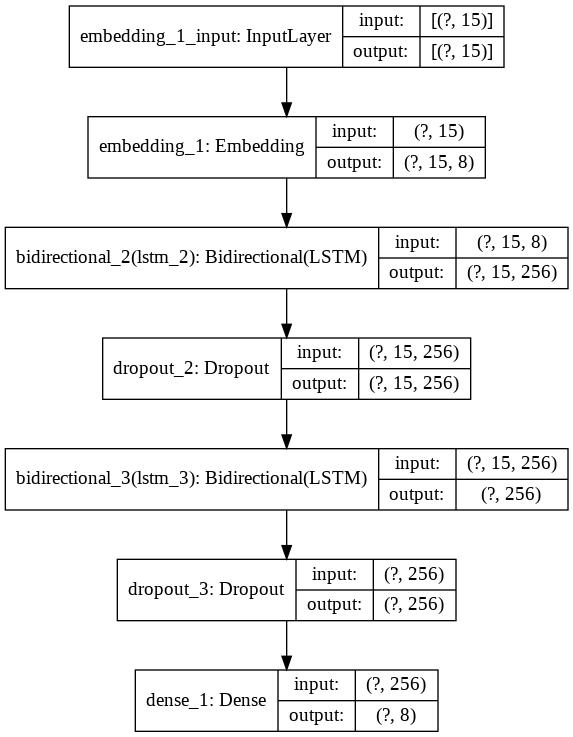

In [ ]:
#plotting model
plot_model(model, show_shapes=True, to_file = 'Bengali_Sentiment_model.png')

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * exp(-k*epoch)
    return lrate
lrate = LearningRateScheduler(exp_decay)

In [ ]:
model_fit = model.fit(X_train, y_train,
                    epochs = 30,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=256,
                    class_weight=class_weight
                    )

Epoch 1/30
982/982 [==============================] - 22s 22ms/step - loss: 11.6393 - accuracy: 0.4598 - val_loss: 1.0586 - val_accuracy: 0.5983
Epoch 2/30
982/982 [==============================] - 20s 20ms/step - loss: 6.4645 - accuracy: 0.6903 - val_loss: 0.8975 - val_accuracy: 0.6859
Epoch 3/30
982/982 [==============================] - 20s 21ms/step - loss: 4.2984 - accuracy: 0.7913 - val_loss: 0.9587 - val_accuracy: 0.6849
Epoch 4/30
982/982 [==============================] - 20s 21ms/step - loss: 3.2379 - accuracy: 0.8385 - val_loss: 0.8749 - val_accuracy: 0.7213
Epoch 5/30
982/982 [==============================] - 20s 21ms/step - loss: 2.6434 - accuracy: 0.8621 - val_loss: 0.9469 - val_accuracy: 0.7154
Epoch 6/30
982/982 [==============================] - 20s 21ms/step - loss: 2.2462 - accuracy: 0.8773 - val_loss: 0.9028 - val_accuracy: 0.7317
Epoch 7/30
982/982 [==============================] - 20s 21ms/step - loss: 1.9947 - accuracy: 0.8872 - val_loss: 0.9579 - val_accuracy

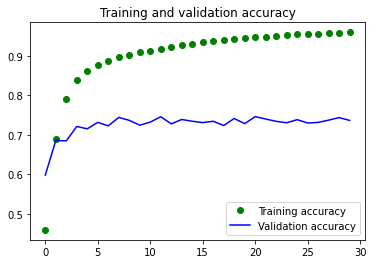

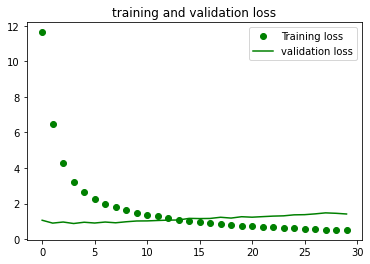

In [ ]:
train_accuracy = model_fit.history['accuracy'] 
loss = model_fit.history['loss']

val_accuracy = model_fit.history['val_accuracy']
val_loss = model_fit.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, train_accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

### Save Model

In [ ]:
model.save('BNC_lstm.h5')


In [ ]:
model = load_model('BNC_lstm.h5')

### Predict with test data

In [ ]:
predictions_prob=model.predict(X_test)
predictions_prob

array([[9.9949670e-01, 2.8171533e-07, 9.7984571e-07, ..., 4.0483606e-05,
        1.5497397e-05, 5.4029275e-08],
       [3.3661901e-04, 1.3868739e-06, 1.9745166e-06, ..., 1.0607966e-06,
        9.9965894e-01, 4.6277119e-08],
       [9.9952805e-01, 2.7857068e-06, 2.6295027e-06, ..., 4.4882926e-04,
        8.5095189e-06, 4.5457046e-10],
       ...,
       [9.9998546e-01, 6.7951987e-08, 1.5344443e-07, ..., 1.0222832e-05,
        3.1363024e-07, 9.7378737e-11],
       [9.9998975e-01, 3.7070149e-07, 8.0610725e-08, ..., 5.9537283e-06,
        3.9400388e-07, 9.7902908e-10],
       [1.6438197e-04, 2.0904653e-04, 9.5943789e-05, ..., 1.3287654e-04,
        9.9931943e-01, 5.6830722e-05]], dtype=float32)

In [ ]:
pred_class = encoder.inverse_transform(model.predict_classes(X_test))
pred_class

array(['bangladesh', 'sports', 'bangladesh', ..., 'bangladesh',
       'bangladesh', 'sports'], dtype='<U13')

In [ ]:
len(pred_class)

119625

In [ ]:
oh_encod_inverse = ohe.inverse_transform(y_test)
label_encode_inverse = encoder.inverse_transform(oh_encod_inverse)
label_encode_inverse

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['bangladesh', 'sports', 'bangladesh', ..., 'bangladesh',
       'bangladesh', 'sports'], dtype='<U13')

### Confusion Matrix

Text(91.68, 0.5, 'Predicted data')

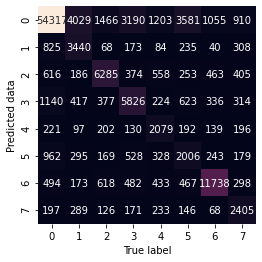

In [ ]:
#finally printing
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(label_encode_inverse, pred_class), square=True, annot=True, fmt='d', cbar=False,
           #xticklabels=digits.target_names,
           #yticklabels=digits.target_names
           )

plt.xlabel('True label')
plt.ylabel('Predicted data')

### Predicting with new data

In [ ]:
def generate_response():
    max_len=15
    input_sentence = input('Enter input news: ')
    Xi_token = tokenizer.texts_to_sequences([input_sentence])
    Xi_pad = pad_sequences(Xi_token, padding='post', maxlen=max_len)
    print('Model predicts')
    preds = model.predict(Xi_pad)
    print('Confidence :') 
    print(preds)
    preds = preds
    total = 0
    for k in range(len(preds[0])):
        print(encoder.inverse_transform([[k]]))
        print('%f %%' %(preds[0,k]*100))
        total += preds[0,k]*100
    #print(total)
    print('Predicted class: %s'%(encoder.inverse_transform(model.predict_classes(Xi_pad))))

In [ ]:
generate_response()


Enter input news: আমি বাংলাদেশকে ভালবাসি
Model predicts
Confidence :
[[5.9077766e-02 1.2981251e-03 3.0569660e-02 1.0069574e-03 3.8889259e-02
  8.0468643e-01 6.3875243e-02 5.9646595e-04]]
['bangladesh']
5.907777 %
['economy']
0.129813 %
['entertainment']
3.056966 %
['international']
0.100696 %
['life-style']
3.888926 %
['opinion']
80.468643 %
['sports']
6.387524 %
['technology']
0.059647 %
Predicted class: ['opinion']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
